In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
df = pd.read_csv('../data/cleaned.csv',index_col = 'rowid')
data_dict = pd.read_csv('../data/tess_oi_data_dictionary.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [37]:
df.head()

,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmdec,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_logg,st_rad,toi_created,rowupdate
rowid,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1000.01,1000,50365310,5.036531e+07,1,PC,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,-0.076,2458493.384,2.17153,1.937,720.000000,5.56480,6563.750000,2507.0,9.604000,485.735,10249.0,4.19,2.17,3/26/2019 13:55,10/30/2020 1:59
2,1001.01,1001,88863718,8.886372e+07,1,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,-15.555,2458492.839,1.93217,3.447,980.000000,5.80204,5753.000000,2426.0,9.423440,295.862,7070.0,4.03,2.01,3/26/2019 13:55,5/20/2020 16:00
3,1002.01,1002,124709665,1.247097e+08,1,PC,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,-2.249,2458492.602,1.86722,1.926,1630.000000,51.16650,38023.400000,3890.0,9.299501,943.109,8924.0,4.03,5.73,3/26/2019 13:55,10/30/2020 1:59
4,1003.01,1003,106997505,1.069975e+08,1,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,1.640,2458493.396,2.74323,3.167,383.410004,51.16650,1177.359985,1631.0,9.300300,7728.170,5388.5,4.15,5.73,3/26/2019 13:55,12/17/2019 10:00
5,1004.01,1004,238597883,2.385979e+08,1,PC,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,9.347,2458493.512,3.57491,2.576,500.000000,4.75276,2929.870000,2049.0,9.135500,356.437,9219.0,4.14,2.15,3/26/2019 13:55,10/30/2020 1:59


In [38]:
df.describe()

,toi,toipfx,tid,ctoi_alias,pl_pnum,ra,dec,st_pmra,st_pmdec,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_logg,st_rad
count,2542.000000,2542.000000,2.542000e+03,2.542000e+03,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2.542000e+03,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000
mean,1306.469221,1306.458694,2.353459e+08,2.353459e+08,1.053108,172.189241,-2.685545,2.657043,-9.971764,2.458741e+06,9.087067,3.045487,6878.578584,9.749743,3392.067656,1369.512879,10.531783,324.352118,5823.809277,4.303218,1.520711
std,703.485798,703.486021,1.626951e+08,1.626951e+08,0.273326,108.057271,50.329869,103.689106,94.696418,2.684671e+02,26.604417,2.071606,18749.815151,11.247935,13478.308289,819.414049,1.536649,517.089074,1683.524618,0.347754,2.522988
min,101.010000,101.000000,1.003831e+06,1.003831e+06,1.000000,0.185606,-89.471513,-1624.050000,-1230.620000,2.458325e+06,0.224200,0.162000,19.634186,0.031542,0.078402,134.959100,4.627800,6.531270,2808.000000,0.100000,0.128000
25%,699.267500,699.250000,1.323180e+08,1.323180e+08,1.000000,81.870857,-47.578068,-14.316750,-20.048500,2.458525e+06,2.095519,1.765500,830.000000,3.037434,80.964886,783.268936,9.629843,112.963000,5108.959985,4.120000,0.870000
50%,1302.510000,1302.500000,2.326386e+08,2.326386e+08,1.000000,149.969384,-14.431830,-0.934000,-2.800500,2.458692e+06,4.155798,2.650578,2400.434508,7.744350,436.415000,1219.913593,10.409000,223.867000,5777.180000,4.340000,1.220000
75%,1910.760000,1910.750000,3.278804e+08,3.278804e+08,1.000000,279.657055,48.267853,15.295250,10.012500,2.458956e+06,8.914732,3.779750,7857.500000,13.868064,1614.617473,1696.645843,11.439850,392.916250,6321.000000,4.509902,1.710000
max,2535.010000,2535.000000,2.041563e+09,2.041563e+09,4.000000,359.900874,89.086923,2074.520000,1048.840000,2.459253e+06,723.826500,32.145206,504062.379900,285.674000,280833.000000,6413.000000,18.332400,9590.750000,50000.000000,5.960650,102.030000


In [39]:
data_dict

,# COLUMN toi: TESS Object of Interest
0,# COLUMN toipfx: TESS Object of Interest Prefix
1,# COLUMN tid: TESS Input Catalog ID
2,# COLUMN ctoi_alias: Community TESS Object of Interest Alias
3,# COLUMN pl_pnum: Pipeline Signal ID
4,# COLUMN tfopwg_disp: TFOPWG Dispostion (CP | FP | KP | PC)
5,# COLUMN rastr: RA [sexagesimal]
6,# COLUMN ra: RA [deg]
7,# COLUMN raerr1: RA Upper Unc
8,# COLUMN raerr2: RA Lower Unc
9,# COLUMN decstr: Dec [sexagesimal]


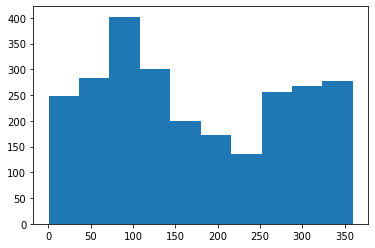

In [40]:
#a very irregular distribution of right ascensions
plt.hist(df['ra']);

/Users/bramblepatch/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


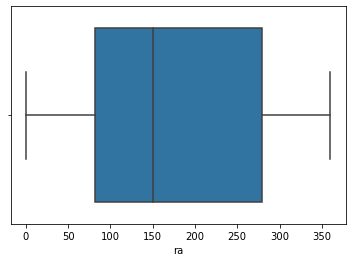

In [41]:
#despite the strange distribution, the 
sns.boxplot(df['ra']);

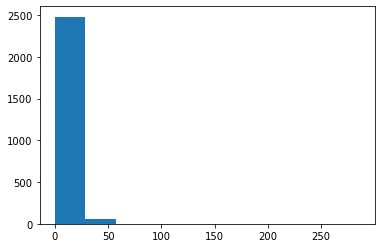

In [42]:
#the Radii distribution is hugely skewed by a couple outliers.
plt.hist(df['pl_rade']);

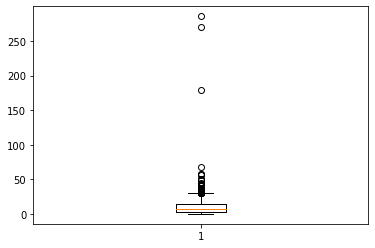

In [43]:
#as suspected, huge outliers.  Let's drop those out.
plt.boxplot(df['pl_rade']);

In [44]:
df[df['pl_rade'] > 50]

,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmdec,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_logg,st_rad,toi_created,rowupdate
rowid,,,,,,,,,,,,,,,,,,,,,,,,,,
3,1002.01,1002,124709665,124709665.0,1,PC,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,-2.249,2458492.602,1.867220,1.926000,1630.000000,51.166500,38023.400000,3890.000000,9.299501,943.109,8924.0,4.030,5.73,3/26/2019 13:55,10/30/2020 1:59
4,1003.01,1003,106997505,106997505.0,1,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,1.640,2458493.396,2.743230,3.167000,383.410004,51.166500,1177.359985,1631.000000,9.300300,7728.170,5388.5,4.150,5.73,3/26/2019 13:55,12/17/2019 10:00
837,1729.01,1729,298666530,298666530.0,1,FP,18h33m35.98s,278.399911,+58d12m19.9s,58.205529,11.763,135.724,2458842.506,0.573209,0.458238,432048.734400,68.407715,5477.793969,2194.174548,18.332400,151.383,5780.0,4.438,1.00,2/19/2020 23:47,4/13/2020 12:00
2402,861.01,861,372913430,372913430.0,1,FP,07h58m08.04s,119.533518,-60d46m49.8s,-60.780499,-3.810,12.358,2458333.399,13.477940,2.745000,4383.700000,57.117500,1433.430000,1714.000000,8.350200,422.358,10341.0,3.800,3.39,7/9/2019 14:50,8/3/2020 16:00
2403,862.01,862,309254930,309254930.0,1,PC,08h17m12.01s,124.300024,-65d39m25.49s,-65.657080,-13.600,20.100,2459175.096,3.310168,2.700377,5187.642464,57.117500,528.716184,1222.997025,8.990400,422.358,10341.0,3.800,3.39,7/9/2019 14:50,2/11/2021 12:01
2427,884.01,884,167031605,167031605.0,1,FP,06h15m41.05s,93.921031,+11d49m57.44s,11.832621,1.717,-2.319,2458468.697,2.780900,1.803000,2990.000000,56.320200,26869.100000,3566.000000,9.953400,1390.460,11246.0,4.430,5.45,3/21/2019 15:42,5/20/2020 16:00
2515,972.01,972,125894957,125894957.0,1,FP,07h41m07.29s,115.280389,-26d04m15.38s,-26.070939,-2.163,3.375,2458493.150,2.674250,3.779000,1920.000000,178.665000,2364.930000,1942.000000,10.548400,3083.920,4770.0,4.180,36.51,3/26/2019 13:55,5/20/2020 16:00
2516,973.01,973,409459226,409459226.0,1,FP,07h19m48.08s,109.950322,-11d56m33.67s,-11.942687,-0.800,1.984,2458491.828,1.279970,2.425000,790.000000,285.674000,379.230000,1229.000000,10.581600,4153.030,3435.0,4.180,102.03,3/26/2019 13:55,5/20/2020 16:00
2519,976.01,976,347098457,347098457.0,1,PC,07h49m52.86s,117.470237,-16d01m24.29s,-16.023413,-1.507,2.711,2458492.973,3.149480,2.542000,1870.000000,269.951000,834.402000,1497.000000,10.485600,4189.870,4240.0,4.210,49.16,3/26/2019 13:55,10/30/2020 1:59


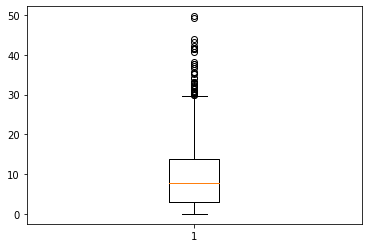

In [45]:
df.drop(df[df['pl_rade'] > 50].index, axis = 0, inplace = True)
plt.boxplot(df['pl_rade']);

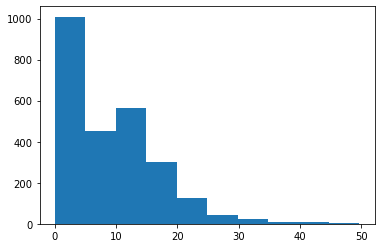

In [46]:
#this looks much better!  Dropping those crazy outliers bring things better in line.  
plt.hist(df['pl_rade']);

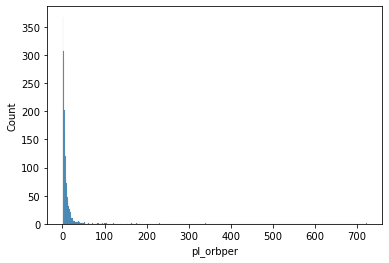

In [49]:
#again, orbital period is full of heavy outliers that throw the plots off
sns.histplot(df['pl_orbper']);

/Users/bramblepatch/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


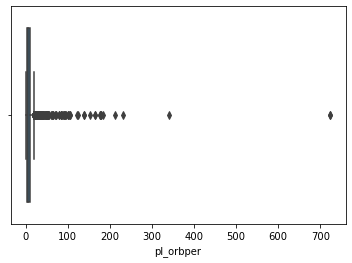

In [52]:
sns.boxplot(df['pl_orbper']);

In [53]:
df[df['pl_orbper'] > 100]

,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmdec,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_logg,st_rad,toi_created,rowupdate
rowid,,,,,,,,,,,,,,,,,,,,,,,,,,
240,1212.01,1212,389924075,3.899241e+08,1,PC,05h51m29.8s,87.874157,-70d59m30.51s,-70.991808,-14.187,-5.031,2458402.036,105.585091,11.606881,462.911621,2.503333,16.716300,563.000000,10.40160,190.9860,5909.569824,4.26154,1.114200,8/26/2019 21:37,10/30/2020 1:59
1144,199.01,199,309792357,3.097924e+08,1,PC,05h20m25.41s,80.105873,-59d53m43.56s,-59.895433,45.702,58.455,2458361.011,104.870750,6.434000,12050.000000,10.128900,2.500120,350.000000,10.03910,102.2700,5350.000000,4.52347,0.880000,10/22/2018 18:35,10/30/2020 1:59
1164,2008.01,2008,70887357,7.088736e+07,1,PC,04h15m25.83s,63.857632,-16d54m07.72s,-16.902144,47.551,-30.747,2459178.168,723.826500,7.573000,1537.000000,13.317500,0.281549,202.000000,8.64807,139.2120,5463.000000,3.77778,1.950000,6/17/2020 20:19,2/11/2021 10:00
1165,2009.01,2009,243187830,2.431878e+08,1,PC,01h07m37.99s,16.908292,+22d57m10.32s,22.952868,103.070,-490.315,2458783.773,723.826500,2.572886,630.724443,1.734382,19.333817,534.809546,7.35510,20.5272,4755.330000,4.62683,0.701499,6/17/2020 20:19,11/5/2020 12:00
1239,2074.01,2074,158075010,1.580750e+08,1,PC,14h32m44.25s,218.184395,+43d45m23.14s,43.756428,-44.888,19.904,2458754.149,177.583051,4.790144,456.090823,3.595373,9.160349,443.708503,8.38689,131.2750,6594.000000,4.16825,1.599780,7/15/2020 20:44,1/9/2021 12:01
1257,2088.01,2088,441765914,4.417659e+08,1,PC,17h25m29.97s,261.374894,+75d52m56.21s,75.882280,-18.935,-1.971,2458769.614,124.725199,7.126561,1883.701723,3.582759,1.733858,292.666600,10.88120,126.4600,4902.000000,4.50260,0.831423,7/15/2020 20:44,9/11/2020 16:00
1260,2090.01,2090,233721037,2.337210e+08,1,PC,18h25m34.57s,276.394048,+64d38m12.77s,64.636881,-9.763,33.890,2458715.334,230.922120,15.860266,284.924743,3.678580,10.509566,459.214872,8.80613,203.2170,6395.000000,3.89312,2.120400,7/15/2020 20:44,9/23/2020 10:00
1261,2091.01,2091,219778329,2.197783e+08,1,PC,17h35m24.5s,263.852071,+64d22m48.48s,64.380132,12.042,-74.434,2458742.875,177.219004,5.569971,295.150196,2.044101,3.445282,347.476908,8.15290,70.2105,5809.000000,4.33351,1.150250,7/15/2020 20:44,9/23/2020 10:00
1448,2257.01,2257,198485881,1.984859e+08,1,PC,12h58m57.51s,194.739614,+77d39m42.18s,77.661716,-35.993,31.425,2458691.275,175.944590,3.648370,5133.814681,2.355605,0.078402,134.959100,12.96720,57.7911,3446.000000,4.89707,0.326932,9/23/2020 20:39,1/9/2021 12:01
